Images extracted successfully.
Calculating PCA with K=30


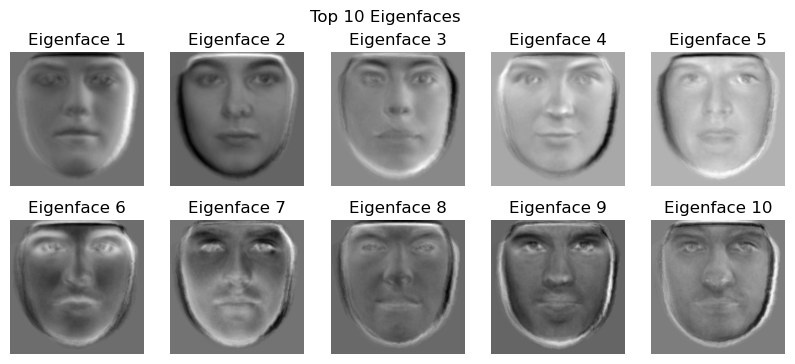

Reconstruction Error with K=30: 237.167070997801


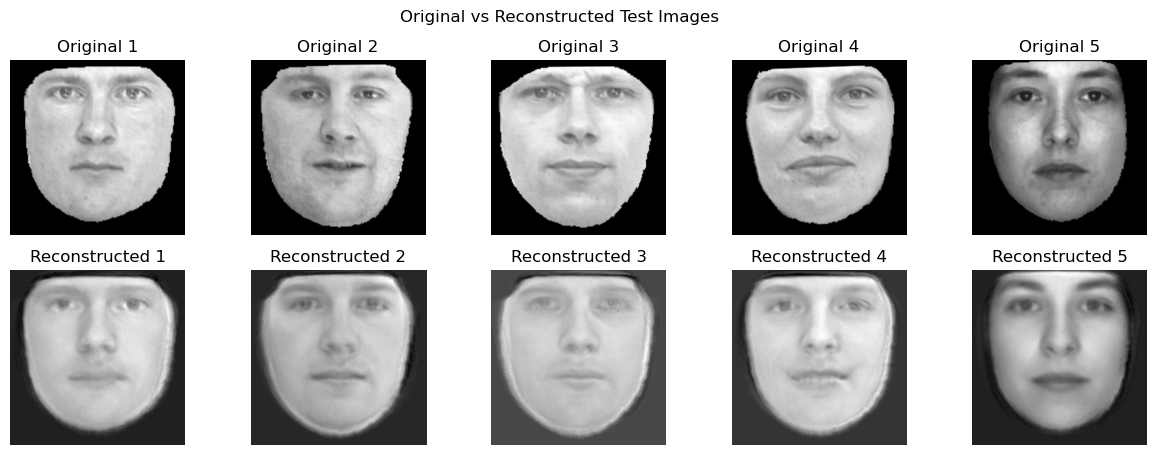

Calculating PCA with K=10
Calculating PCA with K=30
Calculating PCA with K=50
Calculating PCA with K=100
Calculating PCA with K=150


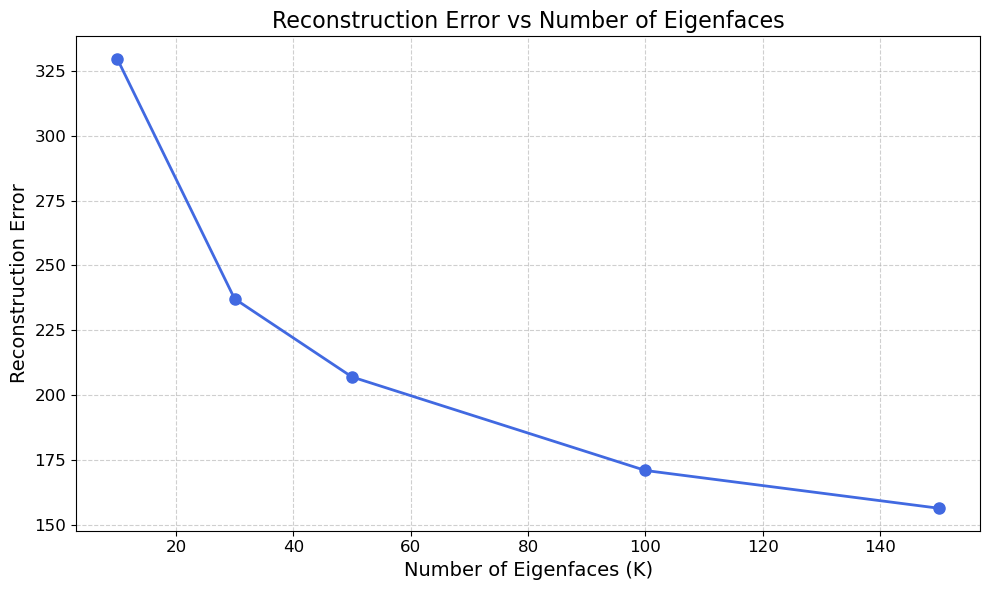

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import zipfile
import os



def extract_imgs(zip_path, folder):
    
    try:
        with zipfile.ZipFile(zip_path, 'r') as archive:
            archive.extractall(folder)
        print("Images extracted successfully.")
    except FileNotFoundError as e:
        print(f"File not found: {e}")
    except zipfile.BadZipFile as e:
        print(f"Invalid zip file: {e}")
    except Exception as e:
        print(f"Unexpected error: {e}")

def load_imgs(folder, img_size=(256, 256)):
    """Loads and flattens grayscale images from a folder."""
    imgs = []
    for fname in sorted(os.listdir(folder)):
        path = os.path.join(folder, fname)
        if os.path.isfile(path) and fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            img = Image.open(path).convert("L")
            img = img.resize(img_size)
            imgs.append(np.asarray(img).flatten())  # Flatten to 1D
    return np.array(imgs)








def compute_pca(data, K):
    """Performs PCA using SVD and returns top K eigenfaces."""
    print(f"Calculating PCA with K={K}")
    U, S, Vt = np.linalg.svd(data, full_matrices=False)
    return Vt[:K]

def reconstruct(data, eigenfaces, mean_face):
    """Reconstructs images by projecting onto the top K eigenfaces and adding the mean face."""
    proj = np.dot(data, eigenfaces.T)
    return np.dot(proj, eigenfaces) + mean_face

def compute_error(orig, recon):
    
    return np.mean((orig - recon) ** 2)

def plot_eigenfaces(eigenfaces, K=10):
    """Displays the top K eigenfaces."""
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(eigenfaces[i].reshape(256, 256), cmap="gray")
        ax.set_title(f"Eigenface {i+1}")
        ax.axis("off")
    plt.suptitle(f"Top {K} Eigenfaces")
    plt.show()





def plot_errors(K_vals, errors):
    """Plots reconstruction error against different K values. """
    plt.figure(figsize=(10, 6))
    plt.plot(K_vals, errors, marker="o", linestyle="-", color="royalblue", markersize=8, linewidth=2)
    plt.xlabel("Number of Eigenfaces (K)", fontsize=14)
    plt.ylabel("Reconstruction Error", fontsize=14)
    plt.title("Reconstruction Error vs Number of Eigenfaces", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

def display_reconstructions(test_images, reconstructed_images, num_images=5):
    
    fig, axes = plt.subplots(2, num_images, figsize=(15, 5))
    for i in range(num_images):
        # Original images
        axes[0, i].imshow(test_images[i].reshape(256, 256), cmap="gray")
        axes[0, i].set_title(f"Original {i+1}")
        axes[0, i].axis("off")
        
        # Reconstructed images
        axes[1, i].imshow(reconstructed_images[i].reshape(256, 256), cmap="gray")
        axes[1, i].set_title(f"Reconstructed {i+1}")
        axes[1, i].axis("off")
    
    plt.suptitle("Original vs Reconstructed Test Images")
    plt.show()

def run_pca_analysis(zip_path, folder, img_size=(256, 256), train_size=157, K_vals=[10, 30, 50, 100, 150]):
    
    
    
    extract_imgs(zip_path, folder)
    
    imgs = load_imgs(folder, img_size)
    train_imgs, test_imgs = imgs[:train_size], imgs[train_size:]
       
    mean_face = np.mean(train_imgs, axis=0)
    train_centered = train_imgs - mean_face
    test_centered = test_imgs - mean_face
    
    # Perform PCA and visualize top K=30 eigenfaces
    K = 30
    eigenfaces = compute_pca(train_centered, K)
    plot_eigenfaces(eigenfaces, K=10)





    
    # Reconstruct test images and calculate the error for K=30
    test_recon = reconstruct(test_centered, eigenfaces, mean_face)
    error_k30 = compute_error(test_imgs, test_recon)
    print(f"Reconstruction Error with K=30: {error_k30}")

    
    display_reconstructions(test_imgs, test_recon, num_images=5)

    # Evaluate reconstruction error for multiple K values and plot errors for different K values
    errors = []
    for K in K_vals:
        eigenfaces = compute_pca(train_centered, K)
        test_recon = reconstruct(test_centered, eigenfaces, mean_face)
        errors.append(compute_error(test_imgs, test_recon))
    
    
    plot_errors(K_vals, errors)




zip_path = '/home/4e5dbe28-d2f1-4c88-a78c-f08221f11edb/Archive.zip'
folder = 'Archive'
run_pca_analysis(zip_path, folder)


